In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import sympy as sy
from mpl_toolkits import mplot3d

In [10]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Task 1

In [265]:
def task1(alpha = (-1,1,0.1)):
    xmin=-1.
    xmax=1.
    ymin=-1.
    ymax=1.
    X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
    XY = np.array([X.flatten(), Y.flatten()])
    A = np.array([[ alpha, alpha],
                  [  -.25, 0.   ]])
    AXY = np.matmul(A, XY)
    U = AXY[0].reshape(X.shape)
    V = AXY[1].reshape(Y.shape)
    eigs = np.linalg.eigvals(A)
    plt.figure()
    plt.streamplot(X, Y, U, V)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(rf'$\alpha= {alpha}$; $\lambda_1={eigs[0]:.2f}$, $\lambda_2={eigs[1]:.2f}$')

In [266]:
interact(task1)

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0, min=-1.0), Output()), _dom_classes=…

<function __main__.task1(alpha=(-1, 1, 0.1))>

<IPython.core.display.Javascript object>


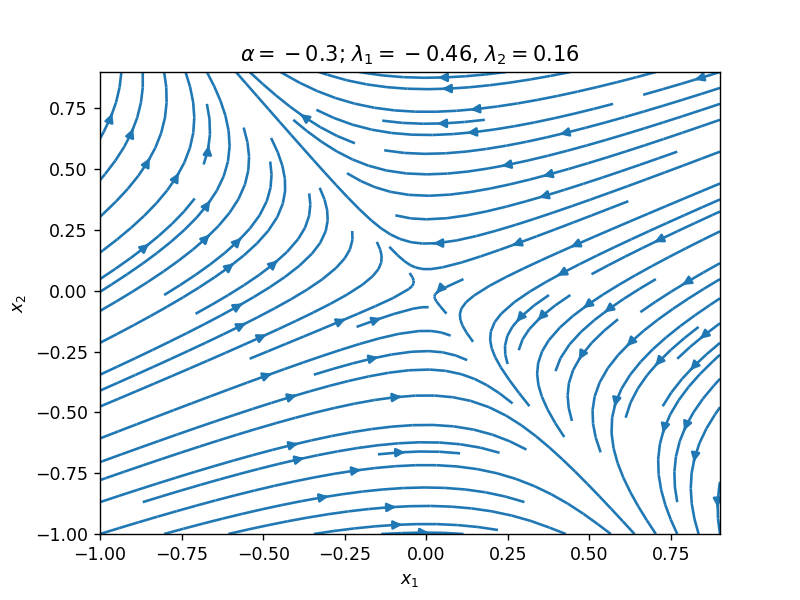

In [267]:
task1(-0.3)

<IPython.core.display.Javascript object>


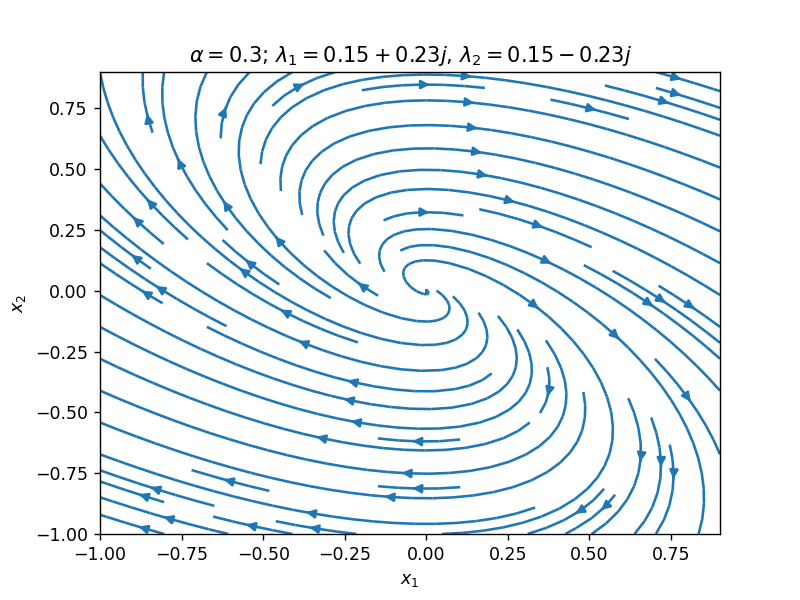

In [268]:
task1(0.3)

<IPython.core.display.Javascript object>


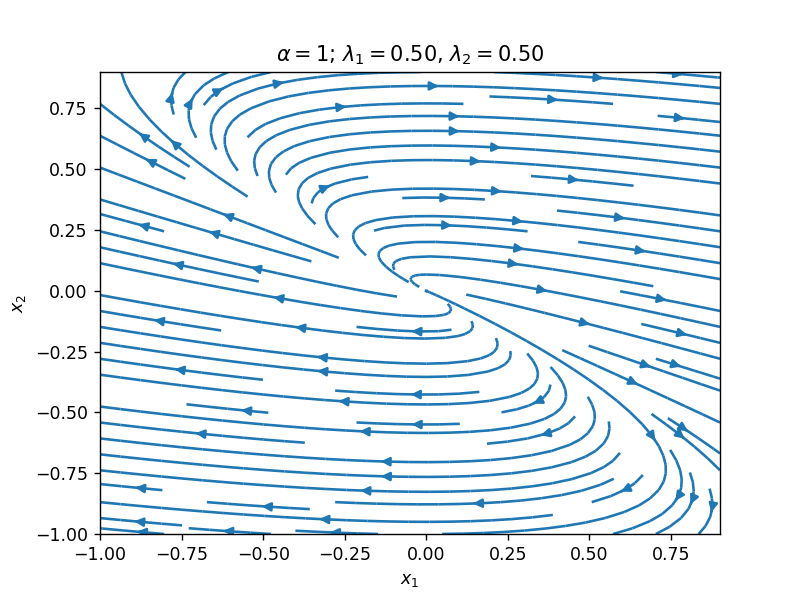

In [269]:
task1(1)

<IPython.core.display.Javascript object>


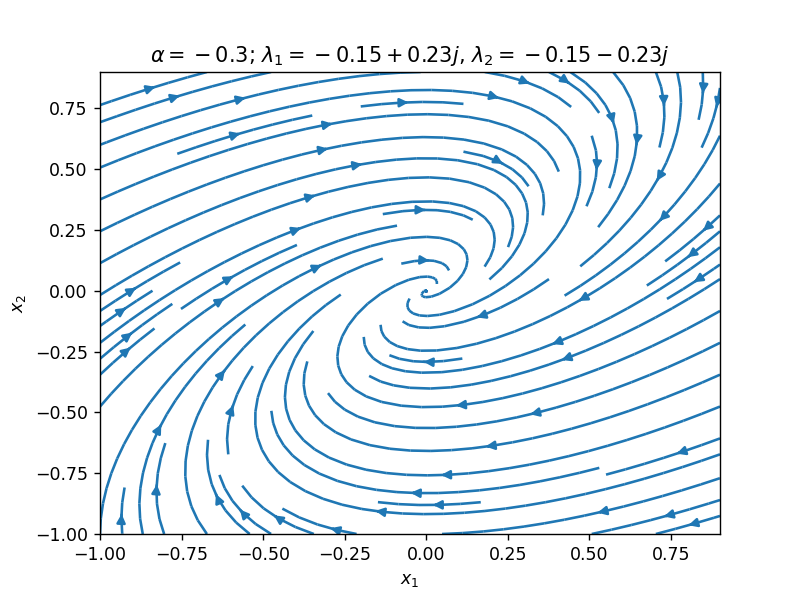

<IPython.core.display.Javascript object>


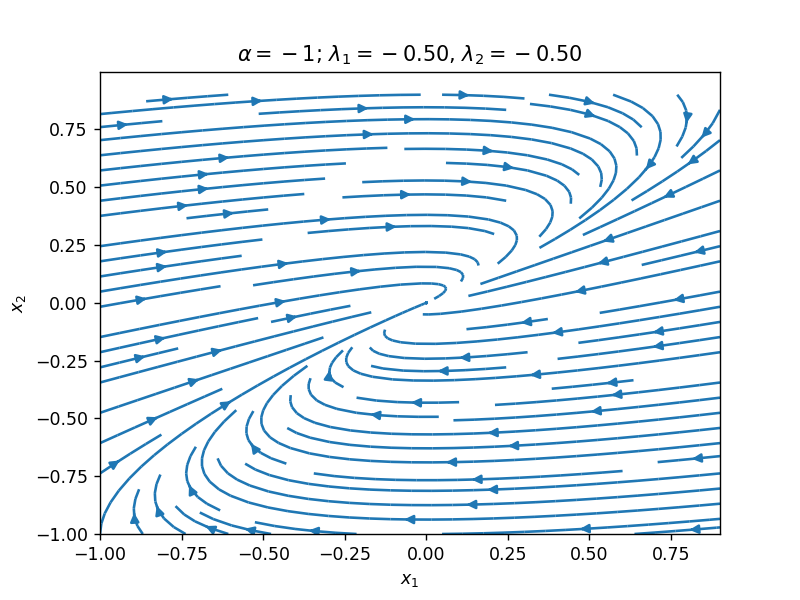

In [271]:
def task1extra(alpha = (-1,1,0.1)):
    xmin=-1.
    xmax=1.
    ymin=-1.
    ymax=1.
    X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
    XY = np.array([X.flatten(), Y.flatten()])
    A = np.array([[ alpha, -alpha],
                  [  -.25, 0.   ]])
    AXY = np.matmul(A, XY)
    U = AXY[0].reshape(X.shape)
    V = AXY[1].reshape(Y.shape)
    eigs = np.linalg.eigvals(A)
    plt.figure()
    plt.streamplot(X, Y, U, V)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(rf'$\alpha= {alpha}$; $\lambda_1={eigs[0]:.2f}$, $\lambda_2={eigs[1]:.2f}$')
    
task1extra(-0.3)
task1extra(-1)

## Task 2

In [21]:
x, alpha = sy.symbols('x alpha')
ex6 = alpha - x**2
ex7 = alpha - 2*x**2 - 3

In [ ]:
ex6

In [ ]:
sy.solveset(ex6, x)

In [ ]:
sol7 = sy.solveset(ex7, x)
sol7

In [ ]:
alpha_num= np.linspace(-1,1,20)[:, None]

In [ ]:
alpha_plot = np.linspace(-1, 1, 100)
branch1 = np.sqrt(alpha_plot)
branch2 = -np.sqrt(alpha_plot)
plt.figure()
plt.scatter(alpha_plot, branch1)
plt.scatter(alpha_plot, branch2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_\infty$")

In [274]:
def task2_1t(alpha=1.):
    T, Y = np.meshgrid( np.arange(0,2,0.1), np.arange(-2,2,0.1))
    U = np.ones(T.shape)
    V = alpha - Y**2
    plt.figure()
    plt.streamplot(T, Y, U, V)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$x$')
interact(task2_1t)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=-1.0), Output()), _dom_classes=…

<function __main__.task2_1t(alpha=1.0)>

In [276]:
def task2_1x(alpha=1.):
    X, Y = np.meshgrid( np.arange(-2,2,0.1), np.arange(-2,2,0.1))
    U = alpha - X**2
    V = -Y
    plt.figure()
    plt.streamplot(X, Y, U, V)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$x_2 = - \dot x_2$')
interact(task2_1x)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=-1.0), Output()), _dom_classes=…

<function __main__.task2_1x(alpha=1.0)>

In [277]:
alpha_plot2 = np.linspace(0, 5)
lam7_1 = sy.lambdify(alpha, sol7.args[0], 'numpy')
lam7_2 = sy.lambdify(alpha, sol7.args[1], 'numpy')
plt.figure()
plt.scatter(alpha_plot2, lam7_1(alpha_plot2))
plt.scatter(alpha_plot2, lam7_2(alpha_plot2))
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_\infty$")

NameError: name 'sol7' is not defined

In [278]:
def task2_2(alpha=2.):
    T, Y = np.meshgrid( np.arange(0,2,0.1), np.arange(-2,2,0.1))
    U = np.ones(T.shape)
    V = alpha - 2*Y**2 - 3
    plt.figure()
    plt.streamplot(T, Y, U, V)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$x_\infty$")
interact(task2_2)

interactive(children=(FloatSlider(value=2.0, description='alpha', max=6.0, min=-2.0), Output()), _dom_classes=…

<function __main__.task2_2(alpha=2.0)>

## Task 3

In [36]:
#%matplotlib inline
def ah(alpha, X, Y):
    U = alpha*X - Y - X*(X**2+Y**2)
    V = X + alpha*Y - Y*(X**2+Y**2)
    return U, V

def task3_ah(alpha=(-5,5,0.1)):
    X, Y = np.meshgrid( np.arange(-2,2,0.1), np.arange(-2,2,0.1))
    U, V = ah(alpha, X, Y)
    plt.figure()
    plt.streamplot(X, Y, U, V)
    if (alpha > 0):
        plt.streamplot(X, Y, U, V, start_points=[(alpha,alpha)], maxlength=100, integration_direction='forward')
    plt.title(rf'$\alpha={alpha}$')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
interact(task3_ah)

interactive(children=(FloatSlider(value=0.0, description='alpha', max=5.0, min=-5.0), Output()), _dom_classes=…

<function __main__.task3_ah(alpha=(-5, 5, 0.1))>

<IPython.core.display.Javascript object>


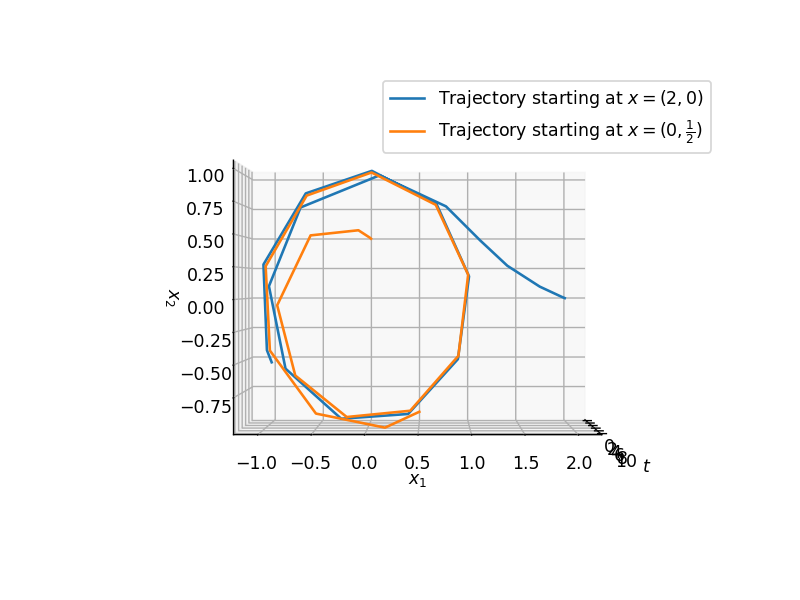

In [12]:
sol_ah_1 = scipy.integrate.solve_ivp(lambda t, x: ah(1., x[0], x[1]), (0, 10), [2., 0])
sol_ah_2 = scipy.integrate.solve_ivp(lambda t, x: ah(1., x[0], x[1]), (0, 10), [0, 0.5])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(sol_ah_1.t, sol_ah_1.y[0], sol_ah_1.y[1], label=r'Trajectory starting at $x=(2, 0)$')
ax.plot(sol_ah_2.t, sol_ah_2.y[0], sol_ah_2.y[1], label=r'Trajectory starting at $x=(0, \frac{1}{2})$')
plt.xlabel(r"$t$")
plt.ylabel(r"$x_1$")
ax.set_zlabel(r"$x_2$")
plt.legend();

In [126]:
a1, a2 = np.meshgrid(np.linspace(-1, 1,1000), np.linspace(-1, 1,1000))

In [14]:
alpha1, alpha2, x = sy.symbols("alpha_1 alpha_2 x")

In [144]:
exp_cusps = sy.solveset(alpha1+alpha2*x-x**3, x, domain=sy.S.Complexes)
print(exp_cusps.args)
exp_cusps

(-alpha_2/(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3) - (-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3)


FiniteSet(-alpha_2/(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3) - (-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3)

In [148]:
# doesn't work in the complex-valued regions
lam_cusps = [np.vectorize(lambda x,y:
                          complex(
                              sy.lambdify((alpha1, alpha2), exp_cusp, ['sympy'])
                                  (x,y)
                          ))       
             for exp_cusp in exp_cusps.args]

In [216]:
def beta(alpha_1, alpha_2):
    return np.power(-27*alpha_1/2 + np.sqrt(729*alpha_1**2 - 108*alpha_2**3,dtype=complex)/2,1/3)

def cuspx01(alpha_1, alpha_2):
    return -alpha_2/beta(alpha_1, alpha_2) - beta(alpha_1, alpha_2)/3

def cuspx02(alpha_1, alpha_2):
    I = 1j
    return  -alpha_2/((-1/2 - np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)) - (-1/2 - np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)/3

def cuspx03(alpha_1, alpha_2):
    I = 1j
    return  -alpha_2/((-1/2 + np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)) - (-1/2 + np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)/3

<IPython.core.display.Javascript object>


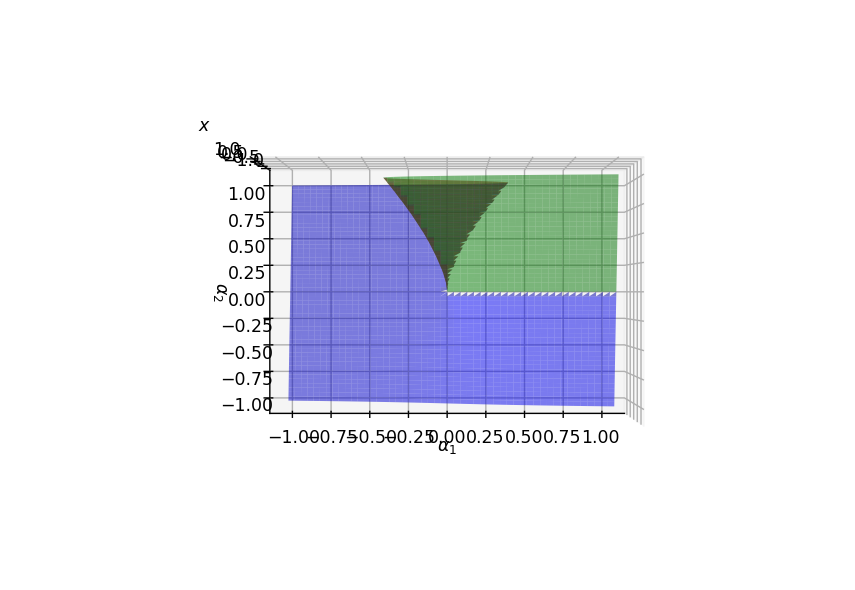

Text(0.5, 0, '$x$')

In [193]:
%matplotlib notebook
def real_only(arr):
    mask = np.abs(np.imag(arr)) > 0.001
    arr[mask] = np.nan
    return arr

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot_surface(a1,a2, real_only(cuspx01(a1,a2)), alpha=0.5, color='b')
ax.plot_surface(a1,a2, real_only(cuspx02(a1,a2)), alpha=0.5, color='r')
ax.plot_surface(a1,a2, real_only(cuspx03(a1,a2)), alpha=0.5, color='g')
ax.view_init(elev=89.999, azim=-90.001)
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")

In [254]:
def cusp_norm_form(alpha_1=(-0.5,.5,0.01), alpha_2=0.5):
    X, Y = np.meshgrid( np.arange(-1,1,0.01), np.arange(-0.5,0.5,0.01))
    U = alpha_1+alpha_2*X-X**3
    V = -Y
    plt.figure()
    plt.streamplot(X, Y, U, V, density=3)
    plt.scatter(real_only(cuspx01(np.array([alpha_1]), np.array([alpha_2]))), 0, facecolor='none', edgecolor='b', s=100)
    plt.scatter(real_only(cuspx02(np.array([alpha_1]), np.array([alpha_2]))), 0, marker='+', color='r', s=100)
    plt.scatter(real_only(cuspx03(np.array([alpha_1]), np.array([alpha_2]))), 0, marker='x', color='g', s=100)
    plt.title(rf'$\alpha_1={alpha_1}$ $\alpha_2={alpha_2}$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$x_2=-\dot x_2$')

interact(cusp_norm_form)

interactive(children=(FloatSlider(value=0.0, description='alpha_1', max=0.5, min=-0.5, step=0.01), FloatSlider…

<function __main__.cusp_norm_form(alpha_1=(-0.5, 0.5, 0.01), alpha_2=0.5)>

<IPython.core.display.Javascript object>


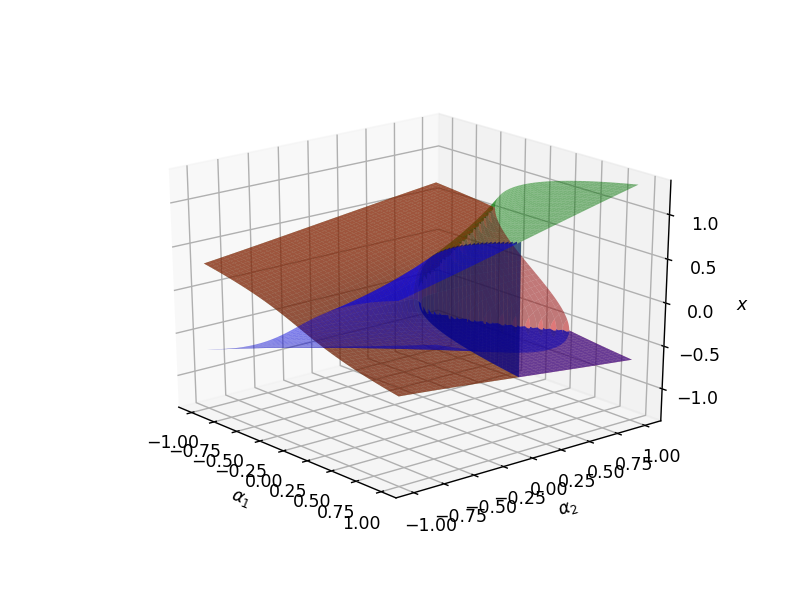

Text(0.5, 0, '$x$')

In [182]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx01(a1,a2), alpha=0.5, color='b')
ax.plot_surface(a1,a2,cuspx02(a1,a2), alpha=0.5, color='r')
ax.plot_surface(a1,a2,cuspx03(a1,a2), alpha=0.5, color='g')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")


<IPython.core.display.Javascript object>


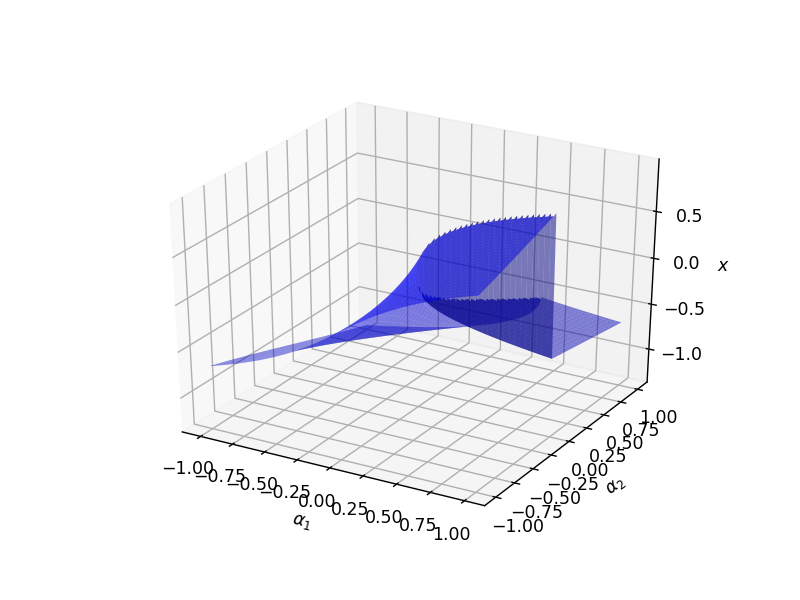

<IPython.core.display.Javascript object>


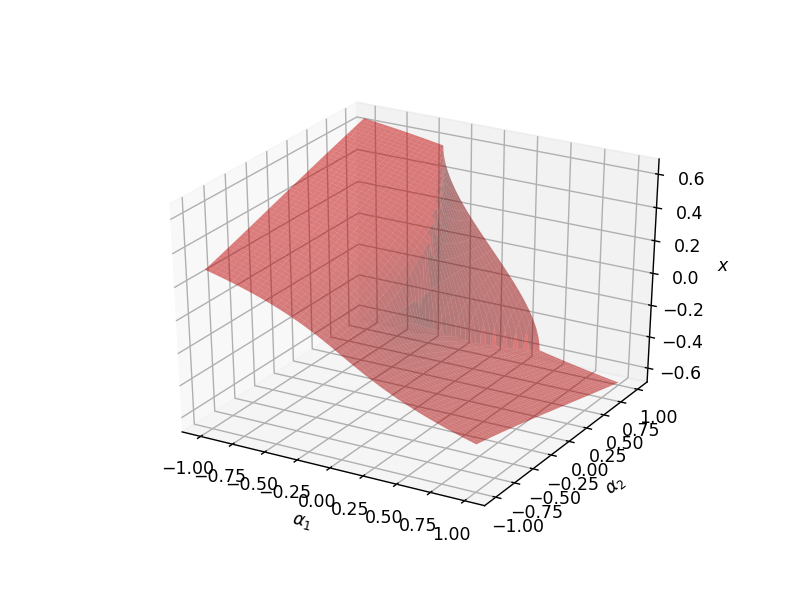

<IPython.core.display.Javascript object>


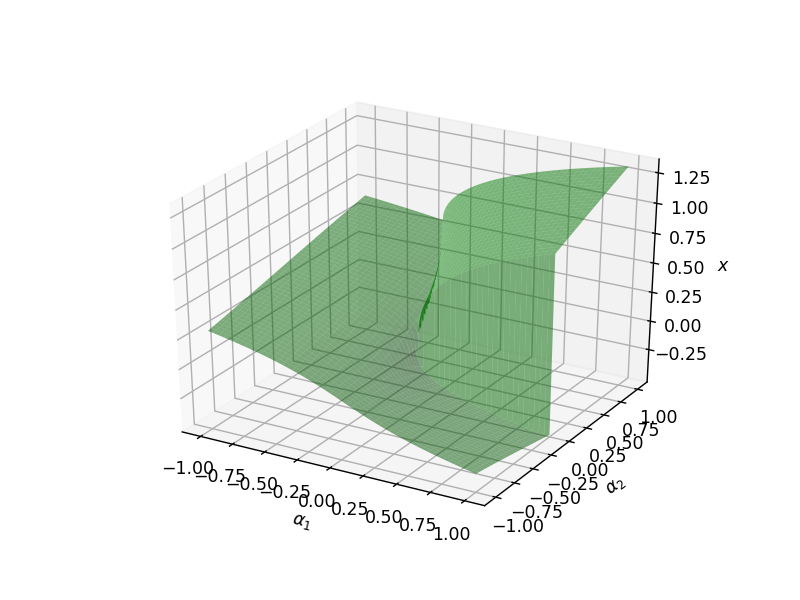

Text(0.5, 0, '$x$')

In [168]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx01(a1,a2), alpha=0.5, color='b')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx02(a1,a2), alpha=0.5, color='r')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx03(a1,a2), alpha=0.5, color='g')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")

## Task 4

In [282]:
def logistic_map(r, x):
    return r*x*(1-x)

<IPython.core.display.Javascript object>


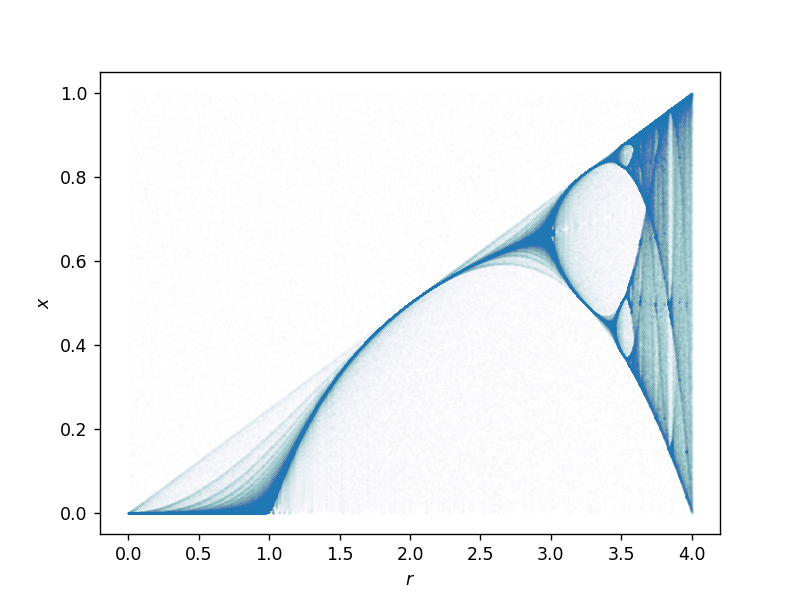

Text(0, 0.5, '$x$')

In [327]:
xs = []
rs = np.linspace(0,4,4000)
rplots = []
for r in rs:
    x0s = np.random.random(10)
    for x0 in x0s:
        x = x0
        for i in range(101):
            xs.append(x)
            rplots.append(r)
            x = logistic_map(r, x)
plt.figure()
plt.scatter(rplots, xs, s=0.001, alpha=0.1)
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')

<IPython.core.display.Javascript object>


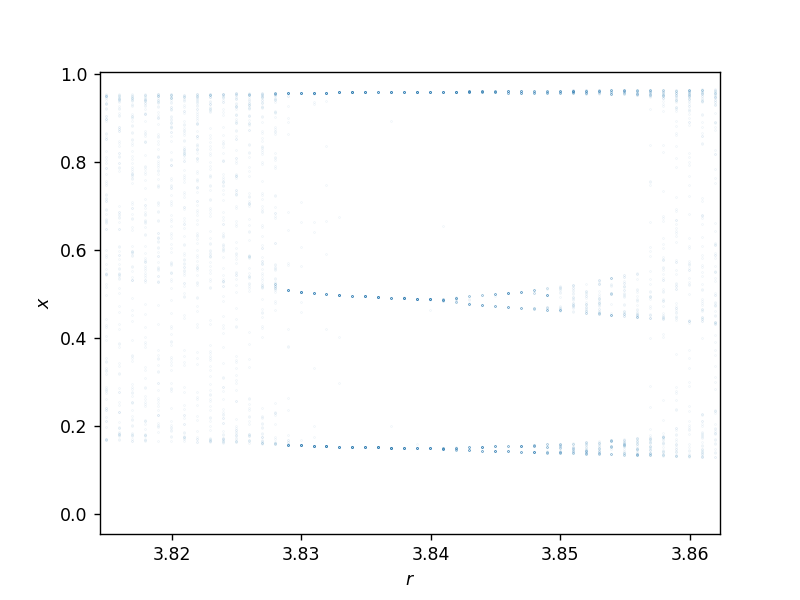

Text(0, 0.5, '$x$')

In [334]:
xs = []
rs = np.linspace(0,4,4000)
rplots = []
for r in rs:
    x0s = np.random.random(100)
    for x0 in x0s:
        x = x0
        for i in range(101):
            x = logistic_map(r, x)
        xs.append(x)
        rplots.append(r)
plt.figure()
plt.scatter(rplots, xs, s=0.01, alpha=0.3)
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')

In [ ]:
x = 0.6
plt.figure()
for i in range(100):
    x = 3.14*x*(1-x)
    plt.scatter([3.14],[x], s=1)

In [ ]:
yinfs = []
alphas = []
x0s = np.linspace(-5,5,20)
als = np.linspace(-1,1,20)
for al in als:
    for x0 in x0s:
        soln = scipy.integrate.solve_ivp(lambda t, x: al-x**2, (0, 10), [x0])
        yinf = soln.y[-1,-1]
        if soln.success and yinf < 10**10: 
            yinfs.append(yinf)
            alphas.append(al)

In [ ]:
ys = []
x0s = np.linspace(-1.1,5,20)
ts = np.linspace(0,2,20)
al = 1.0
for x0 in x0s:
    soln = scipy.integrate.solve_ivp(lambda t, x: al-x**2, (0, 2), [x0], t_eval = ts)
    if soln.success:
        ys.append(soln.y)
    else:
        print(soln.message, soln.y)

In [28]:
def Lorenz_system(t, inp, sigma=10., beta=8./3, rho=28.):
    """
    Trajectory of the Lorenz system for the given parameters
    """
    x,y,z = inp[:]
    dx_dt = sigma*(y-x)
    dy_dt = x*(rho-z) - y
    dz_dt = x*y - beta*z
    return [dx_dt, dy_dt, dz_dt]

In [29]:
sol = scipy.integrate.solve_ivp(Lorenz_system, (0, 1000), [10, 10, 10], max_step=1e-3)

In [ ]:
sol.message

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=sol.t)
fig.colorbar(p)

In [ ]:
sol2 = scipy.integrate.solve_ivp(lambda t,x: Lorenz_system(t,x, rho=0.5), (0, 1000), [10, 10, 10])
fig = plt.figure()
ax = plt.axes(projection='3d')
p = ax.plot(sol2.y[0], sol2.y[1], sol2.y[2])
